<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
digits = pd.read_csv('/content/digits.csv')

In [5]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
pixels = digits.drop("number_label",axis=1)

In [7]:
single_image = pixels.iloc[0]

In [12]:
number = single_image.reshape(8, 8)

In [13]:
number

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

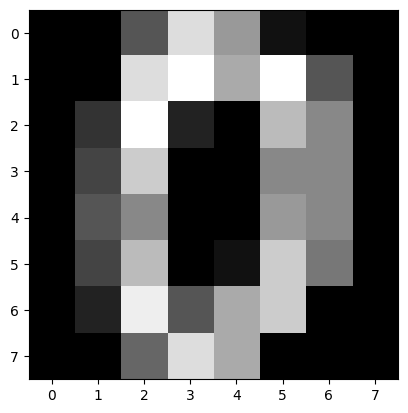

In [14]:
plt.imshow(number, cmap='gray')

<Axes: >

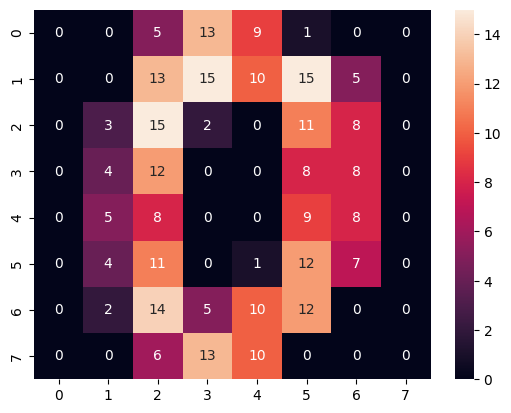

In [15]:
sns.heatmap(number,annot=True)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_pixels = scaler.fit_transform(pixels)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca_model = PCA(n_components=2)

In [21]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [23]:
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [24]:
np.sum(pca_model.explained_variance_ratio_)

np.float64(0.21594970500832805)

<Axes: >

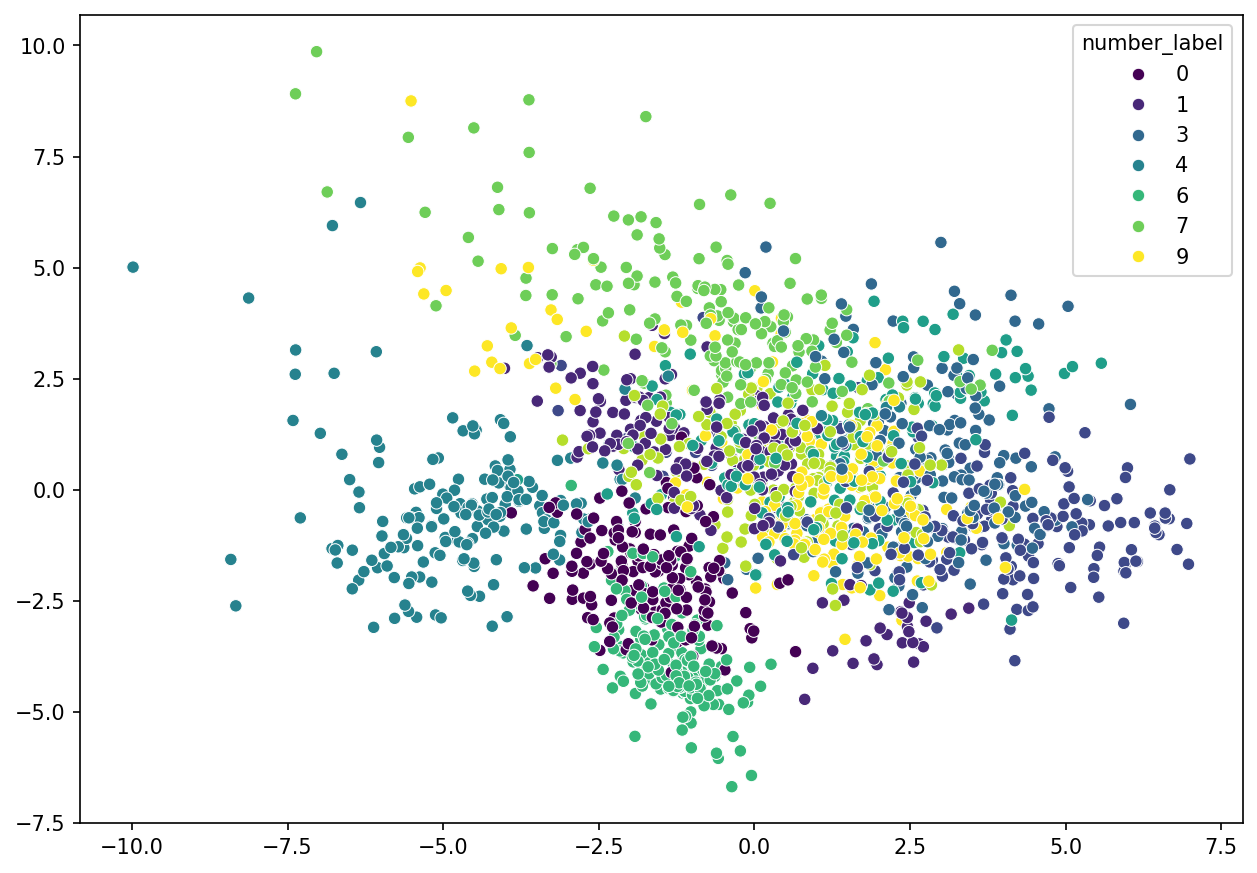

In [29]:
plt.figure(figsize=(10, 7),dpi=150)
sns.scatterplot(
    x=pca_pixels[:, 0],
    y=pca_pixels[:, 1],
    hue=digits['number_label'],
    palette='viridis'
)

In [30]:
pca_model = PCA(n_components=3)

In [31]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [32]:
from mpl_toolkits import mplot3d

In [40]:
%matplotlib notebook
# plt.figure(figsize=(8,8),dpi=200)
ax = plt.axes(projection = "3d")
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label'],cmap='viridis')